In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [5]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [6]:
df.shape

(319795, 18)

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

<AxesSubplot: >

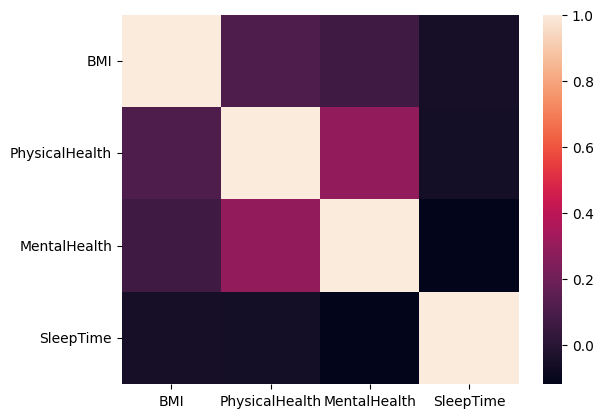

In [8]:
sns.heatmap(df.corr())

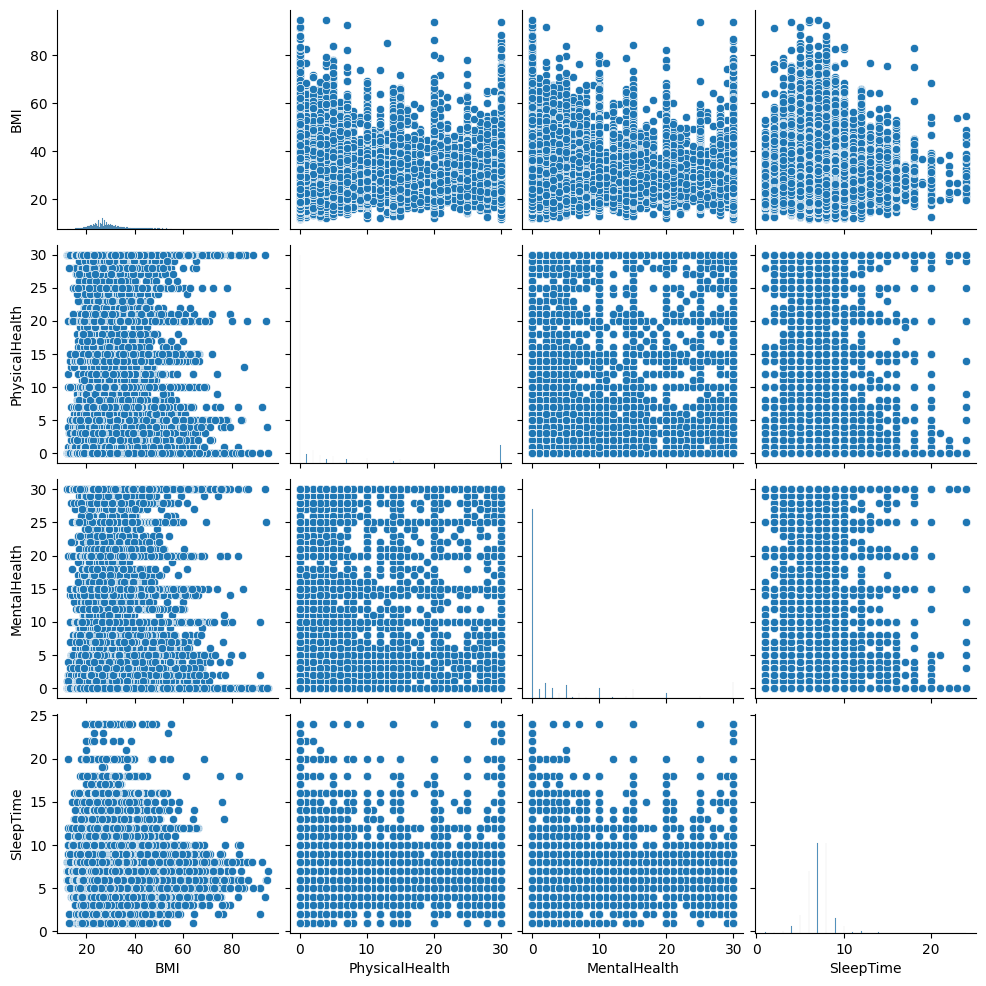

In [9]:
sns.pairplot(df)

In [10]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
label_encoder1 = preprocessing.LabelEncoder()
df['HeartDisease'] = label_encoder1.fit_transform(df['HeartDisease'])

In [8]:
label_encoder1 = preprocessing.LabelEncoder()
df['BMI'] = label_encoder1.fit_transform(df['BMI'])

In [9]:
label_encoder1 = preprocessing.LabelEncoder()
df['Smoking'] = label_encoder1.fit_transform(df['Smoking'])

In [10]:
label_encoder1 = preprocessing.LabelEncoder()
df['AlcoholDrinking'] = label_encoder1.fit_transform(df['AlcoholDrinking'])

In [11]:
label_encoder1 = preprocessing.LabelEncoder()
df['Stroke'] = label_encoder1.fit_transform(df['Stroke'])

In [12]:
label_encoder1 = preprocessing.LabelEncoder()
df['PhysicalHealth'] = label_encoder1.fit_transform(df['PhysicalHealth'])

In [13]:
label_encoder1 = preprocessing.LabelEncoder()
df['MentalHealth'] = label_encoder1.fit_transform(df['MentalHealth'])

In [14]:
label_encoder1 = preprocessing.LabelEncoder()
df['DiffWalking'] = label_encoder1.fit_transform(df['DiffWalking'])

In [15]:
label_encoder1 = preprocessing.LabelEncoder()
df['Sex'] = label_encoder1.fit_transform(df['Sex'])

In [16]:
label_encoder1 = preprocessing.LabelEncoder()
df['AgeCategory'] = label_encoder1.fit_transform(df['AgeCategory'])

In [17]:
label_encoder1 = preprocessing.LabelEncoder()
df['Race'] = label_encoder1.fit_transform(df['Race'])

In [18]:
label_encoder1 = preprocessing.LabelEncoder()
df['Diabetic'] = label_encoder1.fit_transform(df['Diabetic'])

In [19]:
label_encoder1 = preprocessing.LabelEncoder()
df['PhysicalActivity'] = label_encoder1.fit_transform(df['PhysicalActivity'])

In [20]:
label_encoder1 = preprocessing.LabelEncoder()
df['GenHealth'] = label_encoder1.fit_transform(df['GenHealth'])

In [21]:
label_encoder1 = preprocessing.LabelEncoder()
df['SleepTime'] = label_encoder1.fit_transform(df['SleepTime'])

In [22]:
label_encoder1 = preprocessing.LabelEncoder()
df['Asthma'] = label_encoder1.fit_transform(df['Asthma'])

In [23]:
label_encoder1 = preprocessing.LabelEncoder()
df['KidneyDisease'] = label_encoder1.fit_transform(df['KidneyDisease'])

In [24]:
label_encoder1 = preprocessing.LabelEncoder()
df['SkinCancer'] = label_encoder1.fit_transform(df['SkinCancer'])

In [25]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,1180,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,0,1397,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,0,886,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,0,1658,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


<AxesSubplot: >

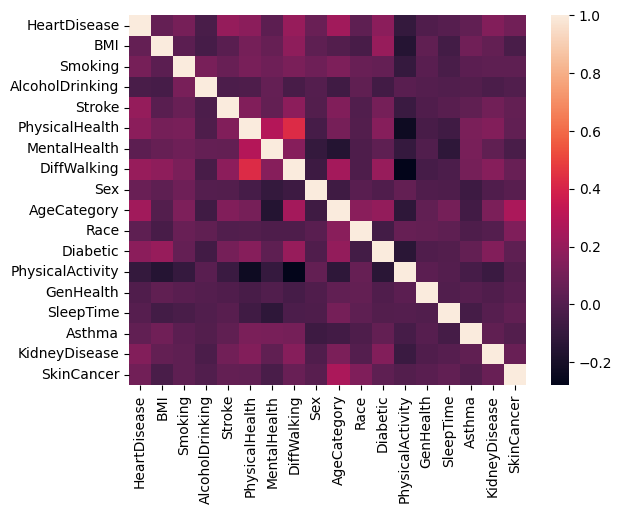

In [30]:
sns.heatmap(df.corr())

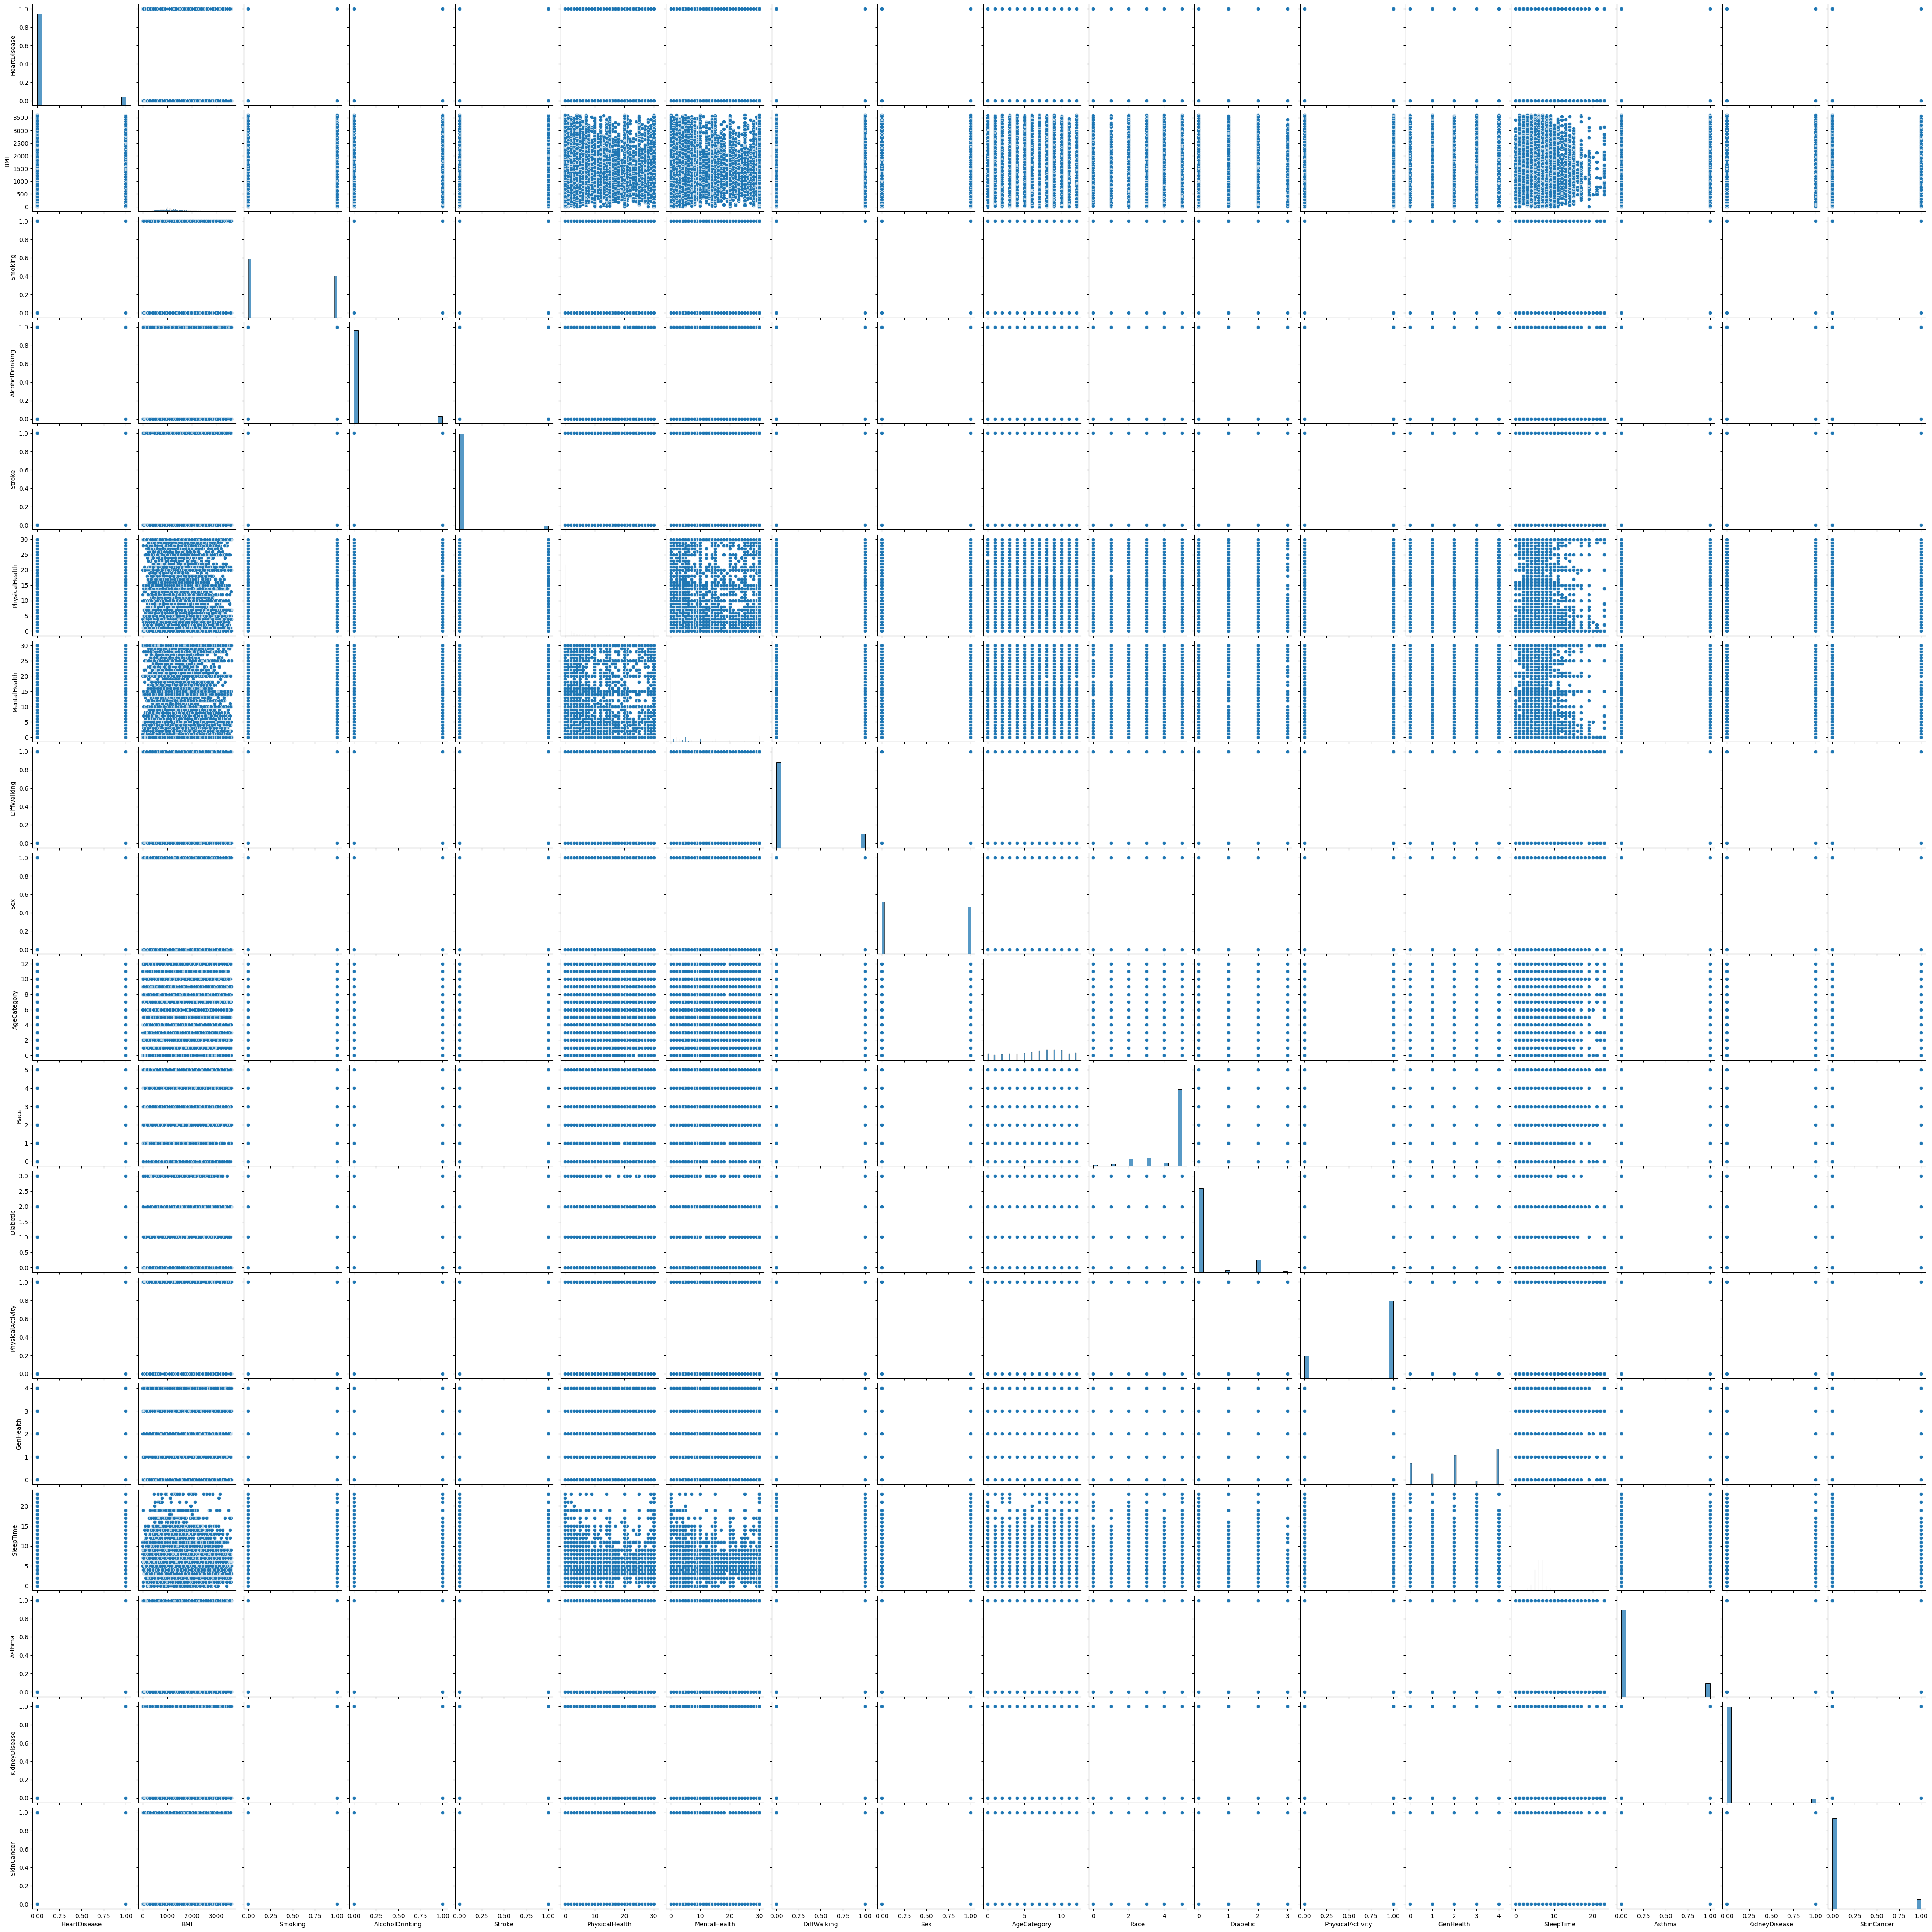

In [31]:
sns.pairplot(df)

In [32]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,1242.142748,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,6.097075,0.134061,0.036833,0.093244
std,0.279766,532.963454,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,866.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000
50%,0.000000,1173.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000
75%,0.000000,1538.000000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,7.000000,0.000000,0.000000,0.000000
max,1.000000,3603.000000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,23.000000,1.000000,1.000000,1.000000


In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()

In [28]:
scaler.fit(df)

StandardScaler()

In [29]:
scaled_data = scaler.transform(df)

In [30]:
X = df.drop(columns=['HeartDisease'])
Y = df['HeartDisease']

In [31]:
X

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,223,1,0,0,3,30,0,0,7,5,2,1,4,4,1,0,1
1,524,0,0,1,0,0,0,0,12,5,0,1,4,6,0,0,0
2,1103,1,0,0,20,30,0,1,9,5,2,1,1,7,1,0,0
3,883,0,0,0,0,0,0,0,11,5,0,0,2,5,0,0,1
4,837,0,0,0,28,0,1,0,4,5,0,1,4,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1180,1,0,0,7,0,1,1,8,3,2,0,1,5,1,0,0
319791,1397,1,0,0,0,0,0,1,3,3,0,1,4,4,1,0,0
319792,886,0,0,0,0,0,0,0,5,3,0,1,2,5,0,0,0
319793,1658,0,0,0,0,0,0,0,1,3,0,0,2,11,0,0,0


In [32]:
Y.shape

(319795,)

In [33]:
from sklearn import metrics

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3, random_state=50)

In [35]:
logreg = LogisticRegression()

In [36]:
logreg.fit(xtrain, ytrain)

LogisticRegression()

In [37]:
y_pred = logreg.predict(xtest)

In [38]:
accuracy = logreg.score(xtest,ytest)

In [39]:
accuracy

0.9132052658460064

In [52]:
lin_model = LinearRegression()

In [53]:
lin_model.fit(xtrain, ytrain)

LinearRegression()

In [54]:
predictions = lin_model.predict(xtest)

In [55]:
accuracy = lin_model.score(xtest, ytest)

In [56]:
accuracy

0.002652987856423872

In [57]:
knn=KNeighborsClassifier(n_neighbors=5)

In [58]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [59]:
pred = knn.predict(xtest)

In [60]:
accuracy= accuracy_score(ytest,pred)

In [61]:
accuracy

0.9108808722208903

In [62]:
rf_classifier = RandomForestClassifier(n_estimators=10)

In [63]:
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=10)

In [64]:
prediction = rf_classifier.predict(xtest)

In [65]:
accuracy_score(ytest,prediction)

0.9039806543741336

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
model = DecisionTreeClassifier()

In [68]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [69]:
predict = model.predict(xtest)

In [70]:
accuracy_score(ytest,prediction)

0.9039806543741336

In [40]:
import pickle

with open('logreg.pkl', 'wb') as file:
    pickle.dump(logreg, file)

In [41]:
import numpy as np

with open('logreg.pkl', 'rb') as file:
    model = pickle.load(file)

input_features = np.array([[524, 0, 0, 1, 0, 0, 0, 0, 12, 5, 0, 1, 4, 6, 0, 0, 0]])

prediction_prob = model.predict_proba(input_features)[0][1]

prediction_binary = model.predict(input_features)[0]

prediction = 'Yes' if prediction_binary == 1 else 'No'

print(f"Prediction Probability of Heart Disease: {prediction_prob}")
print(f"Prediction: Heart Disease: {prediction}")


Prediction Probability of Heart Disease: 0.11182966809138387
Prediction: Heart Disease: No
